# Plots for SFR-Stellar Mass-Size Paper

This is an outline of the results that will go into the first paper.  The first paper will focus on the $$SFR-M_{*}-Size$$ relation, where $$Size \equiv R_e(24)/R_e(r).$$

In [309]:
import numpy as np
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

As of 1/6/16, need to make one more pass through the sample and remove galaxies that are blended with nearby companion.  Not sure if people think the numbers in each panel are useful.  

Galaxies that are blended with a nearby companion are:

* 99056 - Hercules
* 103927 - Coma
* 103933 (AGN) - Coma
* 140160 - A1367
* 143485 - MKW11
* 146607 - Hercules

*ALSO* running this from ipython and using *paperplots()*.


## Converting SDSS Magnitude Limit to Stellar Mass Cut

In [377]:
# Now moving on to the SFR-M*-Size analysis

%run ~/Dropbox/pythonCode/LCSanalyzeblue.py

did not find  99840
did not find  146607


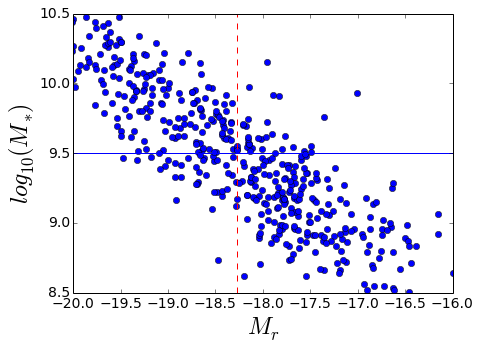

In [357]:
# using John Moustakas's stellar mass estimates
figure()
plot(s.s.ABSMAG[:,4][s.blueflag2],s.logstellarmass[s.blueflag2],'bo')
xlabel('$M_r$')
ylabel('$ log_{10}(M_*) $')
# r-band limit
rlim=17.7
# distance modulus to Hercules, the furthest cluster
mM=35.97
# absolute mag limit corresponding to r=17.7
Mr=rlim-mM
axvline(x=Mr,ls='--',color='r')
axis([-20,-16,8.5,10.5])
axhline(y=minmass)


**RESULT:**   SDSS mag limit corresponds to a stellar mass cut of approximately $log_{10}(M_*) > 9.5$.


## Select Blue Galaxies using NUV-r Color 

I have limited the sample to blue galaxies only, using a NUV-r color cut:

    self.NUVr=self.s.ABSMAG[:,1] - self.s.ABSMAG[:,4]
    self.blueflag2=self.NUVr < 4.1
    
Some galaxies don't have GALEX data (JM is checking into why this is the case).  For these, I require u-r < 1.8.

We have a total of **138 blue star-forming galaxies** with successful GALFIT fits.

* 70 cluster members
* 51 near-field galaxies
* 17 field galaxies

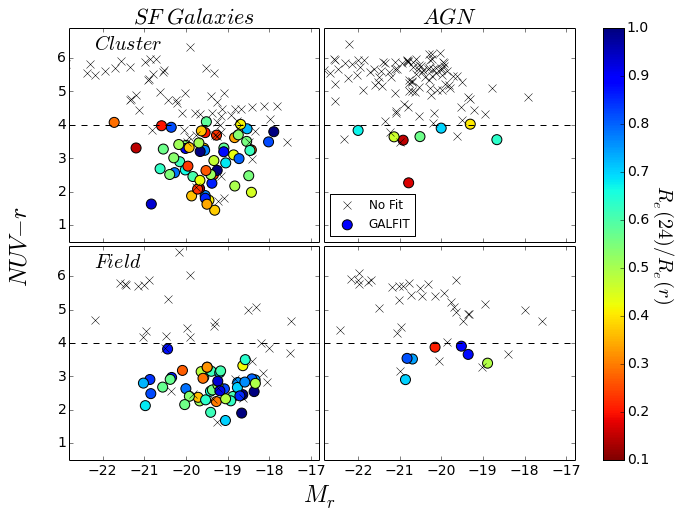

In [373]:
s.plotsalimcolormag()

# SFR-Mass-Size for Blue Galaxies only

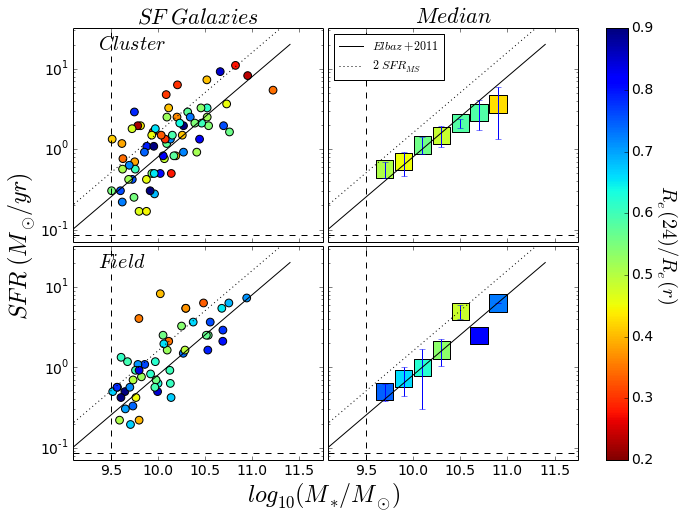

In [384]:
# For blue galaxies only
s.plotSFRStellarmassSizeBlue(blueflag=True,plotbadfits=False)

In [375]:
# to compare size distributions
print 'comparing size ratios for field vs cluster'
f1=s.bluesampleflag & ~s.membflag & ~s.agnflag
m1=s.bluesampleflag & s.membflag & ~s.agnflag
t=ks(s.s.SIZE_RATIO[f1],s.s.SIZE_RATIO[m1])
print 'mean of field = %5.2f +/- %5.2f'%(mean(s.s.SIZE_RATIO[f1]),std(s.s.SIZE_RATIO[f1])/sqrt(1.*sum(f1)))
print 'mean of clust = %5.2f +/- %5.2f'%(mean(s.s.SIZE_RATIO[m1]),std(s.s.SIZE_RATIO[m1])/sqrt(1.*sum(m1)))

comparing size ratios for field vs cluster
KS Test:
D =   0.30
p-vale = 0.00290 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   4.54
p-vale = 0.00521 (prob that samples are from same distribution)
mean of field =  0.67 +/-  0.03
mean of clust =  0.56 +/-  0.03


$cluster$: 
 	 N_SF  =  68, size =  0.56 ( 0.54) +/-  0.03 
 	 N_AGN =  10, size =  0.40 ( 0.43) +/-  0.07 
	 N_ALL =  78, size =  0.54 ( 0.54) +/-  0.03 


$near \ field$: 
 	 N_SF  =  51, size =  0.66 ( 0.64) +/-  0.03 
 	 N_AGN =   8, size =  0.67 ( 0.72) +/-  0.08 
	 N_ALL =  59, size =  0.66 ( 0.65) +/-  0.03 


$field$: 
 	 N_SF  =  16, size =  0.71 ( 0.70) +/-  0.07 
 	 N_AGN =   2, size =  0.68 ( 0.68) +/-  0.05 
	 N_ALL =  18, size =  0.71 ( 0.70) +/-  0.06 




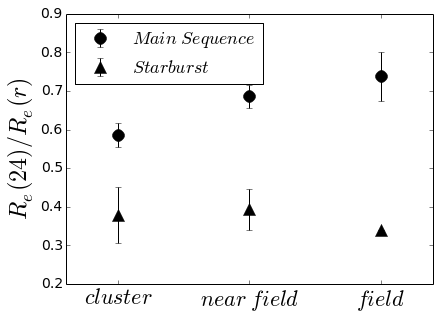

In [378]:
s.printsizeblue()

** RESULT: **

The ratio of Re(24)/Re(r) increases as galaxy environment transitions from cluster, to near field,  and to field.  The difference in size ratios is significant at the $3\sigma$ level.

Interestingly, the cluster and field galaxies are both consistent with the star-forming main sequence, even though the star-formation is more compact on average in the cluster galaxies.  Thus, the size of the star-forming region is an important parameter to add to the SFR-Mass analysis when looking at galaxy properties as a function of environment.

## Starburst Galaxies

In [383]:
s.calc_size_starburst()

mean (median) size of starburst galaxies =  0.38 ( 0.35) +/-  0.05
mean (median) size of non-starburst galaxies =  0.64 ( 0.62) +/- 0.0216

 CLUSTER ONLY 

mean (median) size of starburst galaxies =  0.38 ( 0.36) +/-  0.07
mean (median) size of non-starburst galaxies =  0.56 ( 0.55) +/- 0.0300

 FIELD ONLY 

mean (median) size of starburst galaxies =  0.38 ( 0.35) +/-  0.05
mean (median) size of non-starburst galaxies =  0.69 ( 0.70) +/- 0.0252


## The Impact of Coma

Cluster: 
 	 N_SF  =  53, size =  0.59 ( 0.56) +/-  0.04 
 	 N_AGN =   5, size =  0.30 ( 0.15) +/-  0.10 
	 N_ALL =  58, size =  0.57 ( 0.55) +/-  0.03 


Near Field: 
 	 N_SF  =  50, size =  0.66 ( 0.65) +/-  0.03 
 	 N_AGN =   8, size =  0.67 ( 0.72) +/-  0.08 
	 N_ALL =  58, size =  0.66 ( 0.67) +/-  0.03 


Field: 
 	 N_SF  =  11, size =  0.66 ( 0.68) +/-  0.08 
 	 N_AGN =   2, size =  0.68 ( 0.68) +/-  0.05 
	 N_ALL =  13, size =  0.66 ( 0.68) +/-  0.07 


KS Test:
D =   0.24
p-vale = 0.06511 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   1.37
p-vale = 0.08740 (prob that samples are from same distribution)


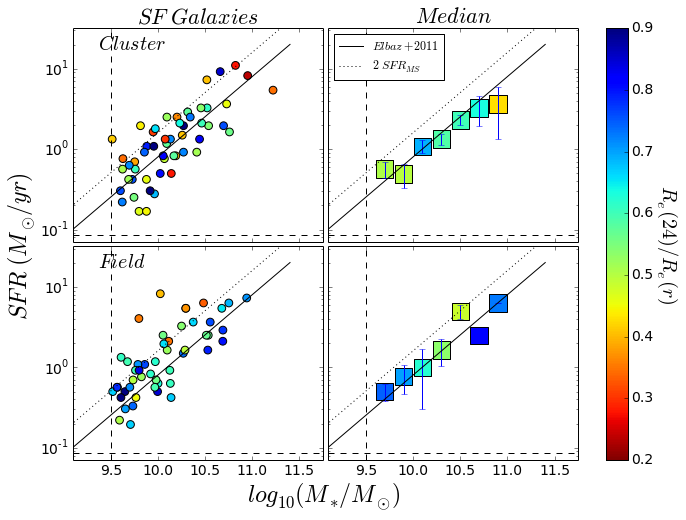

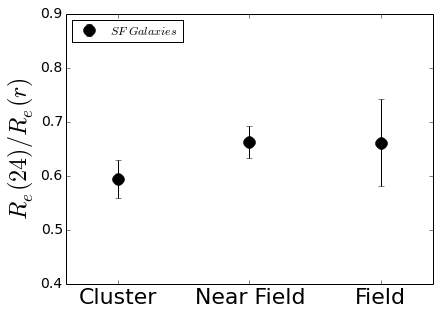

In [382]:
# comparing sizes for sample with Coma removed
nc.plotSFRStellarmassSizeBlue(blueflag=True,plotbadfits=False)
nc.printsize()
ncf1=nc.bluesampleflag & ~nc.membflag & ~nc.agnflag
ncm1=nc.bluesampleflag & nc.membflag & ~nc.agnflag
t=ks(nc.s.SIZE_RATIO[ncf1],nc.s.SIZE_RATIO[ncm1])

**RESULT:** 

The difference in size ratios between cluster and field galaxies is not as significant once Coma is removed from the sample.  The difference between the field and cluster galaxies is at the $2\sigma$ level.  The conclusion is that Coma is important or unique among the clusters in the sample.  Perhaps environmental effects are stronger in the more X-ray luminous environment, or maybe the sample size gets too small once Coma is removed (weak, I admit).

## Checking for Other Hidden Systematics

Need to make sure that we are not seeing the effect of some
parameter that is linked with environment.  For example, B/T
is strongly correlated with environments.

Check:

* stellar mass
* B/T
* sSFR 
* B/A
    

In [380]:
# stellar mass

print 'comparing stellar mass for field vs cluster'
f1=s.bluesampleflag & ~s.membflag & ~s.agnflag
m1=s.bluesampleflag & s.membflag & ~s.agnflag
t=ks(s.logstellarmass[f1],s.logstellarmass[m1])

# B/T

print ''
print 'comparing B/T for field vs cluster'
f1=s.bluesampleflag & ~s.membflag & ~s.agnflag & s.gim2dflag
m1=s.bluesampleflag & s.membflag & ~s.agnflag & s.gim2dflag
t=ks(s.s.B_T_r[f1],s.s.B_T_r[m1])

# ssfr

print ''
print 'comparing sSFR for field vs cluster'
f1=s.bluesampleflag & ~s.membflag & ~s.agnflag 
m1=s.bluesampleflag & s.membflag & ~s.agnflag 
t=ks(log10(s.ssfr[f1]),log10(s.ssfr[m1]))

# B/A

print ''
print 'comparing B/A for field vs cluster'
f1=s.bluesampleflag & ~s.membflag & ~s.agnflag 
m1=s.bluesampleflag & s.membflag & ~s.agnflag 
t=ks((s.s.SERSIC_BA[f1]),(s.s.SERSIC_BA[m1]))

# ir surface brightness 

print ''
print 'comparing $L{IR}/R_e(24)^2$ for field vs cluster'
f1=s.bluesampleflag & ~s.membflag & ~s.agnflag 
m1=s.bluesampleflag & s.membflag & ~s.agnflag 
t=ks(log10(s.sigma_ir[f1]),log10(s.sigma_ir[m1]))

# size

print ''
print 'comparing Re(24)/Re(r) for field vs cluster'
f1=s.bluesampleflag & ~s.membflag & ~s.agnflag 
m1=s.bluesampleflag & s.membflag & ~s.agnflag 
t=ks((s.s.SIZE_RATIO[f1]),(s.s.SIZE_RATIO[m1]))

comparing stellar mass for field vs cluster
KS Test:
D =   0.18
p-vale = 0.18238 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.21
p-vale = 0.43278 (prob that samples are from same distribution)

comparing B/T for field vs cluster
KS Test:
D =   0.20
p-vale = 0.15736 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.27
p-vale = 0.46176 (prob that samples are from same distribution)

comparing sSFR for field vs cluster
KS Test:
D =   0.19
p-vale = 0.16298 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.25
p-vale = 0.45440 (prob that samples are from same distribution)

comparing B/A for field vs cluster
KS Test:
D =   0.16
p-vale = 0.29447 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.67
p-vale = 0.70785 (prob that samples are from same distribution)

comparing $L{IR}/R_e(24)^2$ for field vs cluster
KS Test:
D =   0.20
p-vale = 0.12293 (prob that s

** RESULT: **  
Difference in size ratio between cluster and field galaxies can't be explained by systematic differences in stellar mass, B/T, sSFR, or B/A.

## IR Surface Brightness

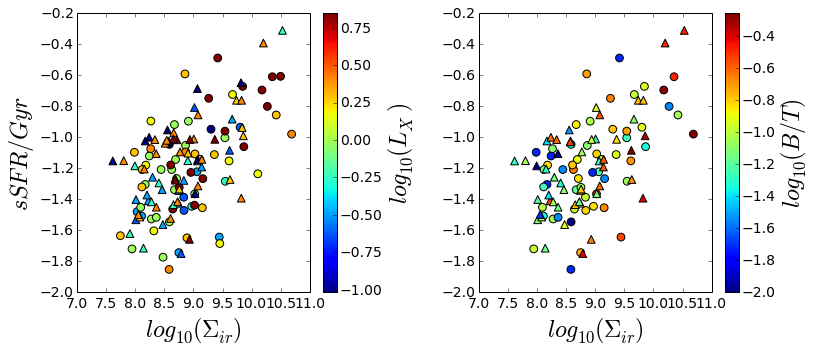

In [352]:
figure(figsize=(12,5))
subplot(1,2,1)
subplots_adjust(wspace=.5)
pcolor=s.s.CLUSTER_LX
pcolorlabel='$log_{10}(L_X)$'
#pcolor=s.s.SIGMA_5
#pcolor=sqrt(s.s.DR_R200**2 + s.s.DELTA_V**2)
#pcolor=10.**s.logstellarmass
#pcolor=s.massdensity
#pcolor=s.s.B_T_r
#pcolorlabel='$log_{10}(B/T)$'

f=s.bluesampleflag & ~s.agnflag & s.membflag 
scatter(log10(s.sigma_ir[f]),log10(s.ssfr[f]*1.e9),c=log10(pcolor[f]),s=60)
f=s.bluesampleflag & ~s.agnflag & ~s.membflag 
scatter(log10(s.sigma_ir[f]),log10(s.ssfr[f]*1.e9),c=log10(pcolor[f]),s=60,marker='^')
#f=s.bluesampleflag & ~s.agnflag & s.fieldflag
#plot(log10(s.sigma_ir[f]),log10(s.ssfr[f]*1.e9),'ks',mfc='None',label='Field')
colorbar(fraction=.08,label=pcolorlabel)
xlabel('$log_{10}(\Sigma_{ir}) $')
ylabel('$sSFR/Gyr$')

subplot(1,2,2)
#pcolor=s.s.CLUSTER_LX
#pcolorlabel='$log_{10}(L_X)$'
#pcolor=s.s.SIGMA_5
#pcolor=sqrt(s.s.DR_R200**2 + s.s.DELTA_V**2)
#pcolor=10.**s.logstellarmass
#pcolor=s.massdensity
pcolor=s.s.B_T_r
pcolorlabel='$log_{10}(B/T)$'

f=s.bluesampleflag & ~s.agnflag & s.membflag & s.gim2dflag
scatter(log10(s.sigma_ir[f]),log10(s.ssfr[f]*1.e9),c=log10(pcolor[f]),s=60)
f=s.bluesampleflag & ~s.agnflag & ~s.membflag & s.gim2dflag
scatter(log10(s.sigma_ir[f]),log10(s.ssfr[f]*1.e9),c=log10(pcolor[f]),s=60,marker='^')
#f=s.bluesampleflag & ~s.agnflag & s.fieldflag
#plot(log10(s.sigma_ir[f]),log10(s.ssfr[f]*1.e9),'ks',mfc='None',label='Field')
colorbar(fraction=.08,label=pcolorlabel)
xlabel('$log_{10}(\Sigma_{ir}) $')
#ylabel('$sSFR/Gyr$')

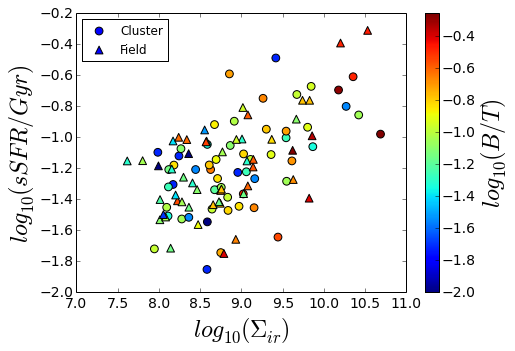

In [353]:
figure()

#pcolor=s.s.CLUSTER_LX
#pcolorlabel='$log_{10}(L_X)$'
#pcolor=s.s.SIGMA_5
#pcolor=sqrt(s.s.DR_R200**2 + s.s.DELTA_V**2)
#pcolor=10.**s.logstellarmass
#pcolor=s.massdensity
pcolor=s.s.B_T_r
pcolorlabel='$log_{10}(B/T)$'

f=s.bluesampleflag & ~s.agnflag & s.membflag & s.gim2dflag
scatter(log10(s.sigma_ir[f]),log10(s.ssfr[f]*1.e9),c=log10(pcolor[f]),s=60,label='Cluster')
f=s.bluesampleflag & ~s.agnflag & ~s.membflag & s.gim2dflag
scatter(log10(s.sigma_ir[f]),log10(s.ssfr[f]*1.e9),c=log10(pcolor[f]),s=60,marker='^',label='Field')
#f=s.bluesampleflag & ~s.agnflag & s.fieldflag
#plot(log10(s.sigma_ir[f]),log10(s.ssfr[f]*1.e9),'ks',mfc='None',label='Field')
colorbar(fraction=.08,label=pcolorlabel)
xlabel('$log_{10}(\Sigma_{ir}) $')
ylabel('$log_{10}(sSFR/Gyr)$')
legend(scatterpoints=1,loc='upper left')

** RESULT: **

Compactness of star-forming region is correlated with B/T.  However, you would expect the two quantities to be correlated.  The stellar mass density must increase as B/T increases, and stellar mass density is correlated with $\Sigma_{IR}$ because stellar mass correlated with SFR, and optical size correlates with IR size.

PAPER 2

Add SFRs to analysis.  Focus on size, stellar mass, SFR relation

* field/cluster samples are comparable in terms of stellar mass, B/T, SFR
* cluster galaxies have smaller size
* cluster and field galaxies are still consistent with the SF main sequence

** RESULTS ** 

* blue galaxies in dense environments have sSFRs that are consistent with the SF main sequence despite having more centrally-concentrated SF disks.
* starburst galaxies have more centrally-concentrated SF disks when compared with galaxies on the SF main sequence, and relative size of SF disk does not appear to vary with environment for these galaxies.
* Coma has an unusually high fraction of starburst galaxies

## Statistics for Comparing SFR between core and external galaxies ##



In [41]:
 %run ~/github/LCS/python/Python3/LCS_MS_rf_plots.py

normalizing by radius of disk
nothing happening here


/Users/rfinn/github/LCS/python/Python3/LCSbase.py:73: RuntimeWarning: divide by zero encountered in true_divide
  self.MAG24 = 2.5*np.log10(3631./(self.s.FLUX24*1.e-6))
/Users/rfinn/github/LCS/python/Python3/LCSbase.py:85: RuntimeWarning: invalid value encountered in true_divide
  self.AGNKAUFF= ((np.log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(np.log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (np.log10(self.s.N2FLUX/self.s.HAFLUX) > 0.)) #& (self.s.HAEW > 0.)
/Users/rfinn/github/LCS/python/Python3/LCSbase.py:85: RuntimeWarning: invalid value encountered in log10
  self.AGNKAUFF= ((np.log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(np.log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (np.log10(self.s.N2FLUX/self.s.HAFLUX) > 0.)) #& (self.s.HAEW > 0.)
/Users/rfinn/github/LCS/python/Python3/LCSbase.py:85: RuntimeWarning: invalid value encountered in greater
  self.AGNKAUFF= ((np.log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(np.log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (np.log10(self.s.N2FLUX/

(1800, 1800)


/Users/rfinn/github/LCS/python/Python3/LCSbase.py:148: RuntimeWarning: divide by zero encountered in log10
  self.sb_obs[flag]=self.s.fcmag1[flag] + 2.5*np.log10(np.pi*((self.s.fcre1[flag]*mipspixelscale)**2)*self.s.fcaxisratio1[flag])
/Users/rfinn/github/LCS/python/Python3/LCSbase.py:162: RuntimeWarning: invalid value encountered in greater
  self.HIflag = self.s.HIMASS > 0.


### Take away ###

used two measures of SF: SFR-Mass (main sequence), and sSFR.  
for SFR vs mass and sSFR vs mass, I fit a first order polynomial to the external galaxies with $9.5 < \log(M/M_\star) < 10.5$.  




* We then calculate distance from MS (parallel to y axis) and distance perpendicular to MS
* I comaparand difference in sSFR (

In [42]:
g.calcstats()

##################################
MS DISTANCE STATS
##################################

KS Test:
D =   0.20
p-vale = 0.02086 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   1.86
p-vale = 0.05463 (prob that samples are from same distribution)
##################################

mean (conf interval = 68.0 %
CORE: -0.502 - -0.445 - -0.371170
EXT : -0.344 - -0.291 - -0.237044

var (conf interval = 68.0 %
CORE: 0.351 - 0.397 - 0.438421
EXT : 0.266 - 0.312 - 0.353349

MAD (conf interval = 68.0 %
CORE: 0.340 - 0.391 - 0.447761
EXT : 0.290 - 0.322 - 0.356640

skew (conf interval = 68.0 %
CORE: -0.585 - -0.441 - -0.306565
EXT : -0.898 - -0.775 - -0.652817

kurt (conf interval = 68.0 %
CORE: -0.733 - -0.483 - -0.172749
EXT : -0.299 - 0.126 - 0.503262



##################################
MS PERPENDICULAR DISTANCE STATS
##################################

KS Test:
D =   0.20
p-vale = 0.02178 (prob that samples are from same distribution)
Anderson-Darling test Tes

In [43]:
g.calcstats(allgals=False)

##################################
MS DISTANCE STATS
##################################

KS Test:
D =   0.22
p-vale = 0.04227 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.97
p-vale = 0.13043 (prob that samples are from same distribution)
##################################

mean (conf interval = 68.0 %
CORE: -0.259 - -0.197 - -0.140772
EXT : -0.145 - -0.106 - -0.067421

var (conf interval = 68.0 %
CORE: 0.169 - 0.214 - 0.257478
EXT : 0.133 - 0.170 - 0.209031

MAD (conf interval = 68.0 %
CORE: 0.247 - 0.280 - 0.309821
EXT : 0.199 - 0.221 - 0.247275

skew (conf interval = 68.0 %
CORE: -0.605 - -0.335 - -0.054492
EXT : -1.192 - -0.913 - -0.599224

kurt (conf interval = 68.0 %
CORE: -0.094 - 0.455 - 1.147813
EXT : 1.118 - 1.943 - 2.757366



##################################
MS PERPENDICULAR DISTANCE STATS
##################################

KS Test:
D =   0.22
p-vale = 0.04898 (prob that samples are from same distribution)
Anderson-Darling test Test:


## where are small galaxies in SFR-M* plane ##

In [6]:
 %run ~/github/LCS/python/Python3/LCS_MS_rf_plots.py

normalizing by radius of disk
nothing happening here


/Users/rfinn/github/LCS/python/Python3/LCSbase.py:73: RuntimeWarning: divide by zero encountered in true_divide
  self.MAG24 = 2.5*np.log10(3631./(self.s.FLUX24*1.e-6))
/Users/rfinn/github/LCS/python/Python3/LCSbase.py:85: RuntimeWarning: invalid value encountered in true_divide
  self.AGNKAUFF= ((np.log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(np.log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (np.log10(self.s.N2FLUX/self.s.HAFLUX) > 0.)) #& (self.s.HAEW > 0.)
/Users/rfinn/github/LCS/python/Python3/LCSbase.py:85: RuntimeWarning: invalid value encountered in log10
  self.AGNKAUFF= ((np.log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(np.log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (np.log10(self.s.N2FLUX/self.s.HAFLUX) > 0.)) #& (self.s.HAEW > 0.)
/Users/rfinn/github/LCS/python/Python3/LCSbase.py:85: RuntimeWarning: invalid value encountered in greater
  self.AGNKAUFF= ((np.log10(self.s.O3FLUX/self.s.HBFLUX) > (.61/(np.log10(self.s.N2FLUX/self.s.HAFLUX)-.05)+1.3)) | (np.log10(self.s.N2FLUX/

(1800, 1800)


/Users/rfinn/github/LCS/python/Python3/LCSbase.py:148: RuntimeWarning: divide by zero encountered in log10
  self.sb_obs[flag]=self.s.fcmag1[flag] + 2.5*np.log10(np.pi*((self.s.fcre1[flag]*mipspixelscale)**2)*self.s.fcaxisratio1[flag])
/Users/rfinn/github/LCS/python/Python3/LCSbase.py:162: RuntimeWarning: invalid value encountered in greater
  self.HIflag = self.s.HIMASS > 0.


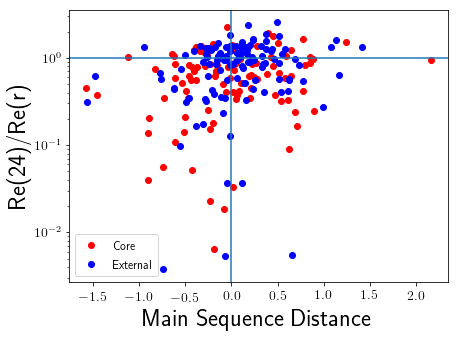

In [11]:
# plot distance from ms vs size
g.plotsizevsmsdist()
plt.yscale('log')
plt.legend()
plt.axvline(x=0)
plt.axhline(y=1)


constraint on disk shrinking time

use sample toy model from paper



In [12]:
g.s.columns

ColDefs(
    name = 'NSAID'; format = 'J'
    name = 'IAUNAME'; format = '19A'
    name = 'SUBDIR'; format = '27A'
    name = 'RA'; format = 'E'
    name = 'DEC'; format = 'E'
    name = 'ZDIST'; format = 'E'
    name = 'SERSIC_TH50'; format = 'E'
    name = 'SERSIC_N'; format = 'E'
    name = 'SERSIC_BA'; format = 'E'
    name = 'SERSIC_PHI'; format = 'E'
    name = 'PETROTH50'; format = 'E'
    name = 'PETROTH90'; format = 'E'
    name = 'D4000'; format = 'E'
    name = 'HAEW'; format = 'E'
    name = 'VDISP'; format = 'E'
    name = 'FA'; format = 'E'
    name = 'HAFLUX'; format = 'E'
    name = 'N2FLUX'; format = 'E'
    name = 'HBFLUX'; format = 'E'
    name = 'O3FLUX'; format = 'E'
    name = 'AHDEW'; format = 'E'
    name = 'AV'; format = 'E'
    name = 'ISDSS'; format = 'J'
    name = 'IALFALFA'; format = 'J'
    name = 'NMGY'; format = '7D'
    name = 'NMGY_IVAR'; format = '7D'
    name = 'ABSMAG'; format = '7D'
    name = 'SERSICFLUX'; format = '7D'
    name = 'CLUMPY'; forma

[-0.5, 12, -0.5, 12]

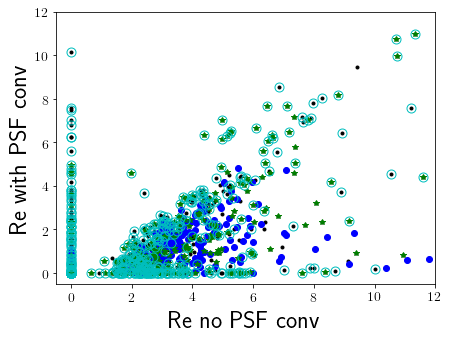

In [24]:
plt.figure()
plt.plot(g.s.fre1, g.s.fcre1,'k.')
plt.plot(g.s.fre1[g.sampleflag], g.s.fcre1[g.sampleflag],'bo')
plt.plot(g.s.fre1[g.agnflag], g.s.fcre1[g.agnflag],'g*')
plt.plot(g.s.fre1[~g.galfitflag], g.s.fcre1[~g.galfitflag],'co',markersize=9, mfc='None')
plt.xlabel('Re no PSF conv')
plt.ylabel('Re with PSF conv')
plt.axis([-.5,12,-.5,12])
#plt.xscale('log')
#plt.yscale('log')

Text(0,0.5,'mag with PSF conv')

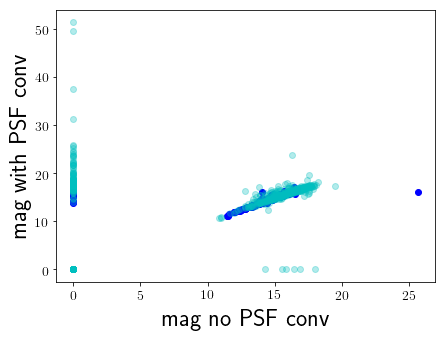

In [39]:
plt.figure()
#plt.plot(g.s.fmag1, g.s.fcre1,'k.')
plt.plot(g.s.fmag1[g.sampleflag], g.s.fcmag1[g.sampleflag],'bo')
#plt.plot(g.s.fmag1[g.agnflag], g.s.fcmag1[g.agnflag],'g*')
plt.plot(g.s.fmag1[~g.galfitflag], g.s.fcmag1[~g.galfitflag],'co',markersize=6,alpha=.3)
plt.xlabel('mag no PSF conv')
plt.ylabel('mag with PSF conv')
#plt.axis([10,18,10,18])
#plt.xscale('log')
#plt.yscale('log')

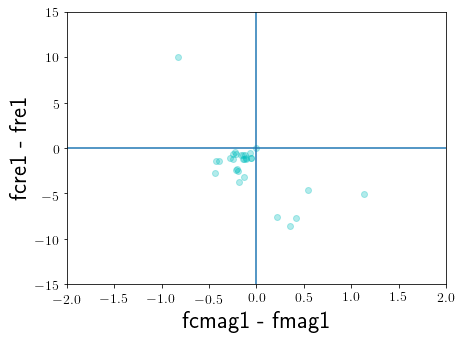

In [57]:
plt.figure()
dr = g.s.fcre1 - g.s.fre1
dm = g.s.fcmag1 - g.s.fmag1
#plt.plot(g.s.fmag1, g.s.fcre1,'k.')
massflag = (g.logstellarmass > 9.7)
flag = g.lirflag & ~g.galfitflag & g.gim2dflag & massflag & ~g.agnflag & g.sizeflag
#plt.plot(g.s.fmag1[g.agnflag], g.s.fcmag1[g.agnflag],'g*')
plt.plot(dm[flag], dr[flag],'co',markersize=6,alpha=.3)
#plt.plot(dm[g.sampleflag], dr[g.sampleflag],'bo',alpha=.3)
plt.xlabel('fcmag1 - fmag1')
plt.ylabel('fcre1 - fre1')
plt.axis([-2,2,-15,15])
plt.axvline(x=0)
plt.axhline(y=0)
#plt.xscale('log')
#plt.yscale('log')

In [58]:
sum(flag)

34